<a href="https://colab.research.google.com/github/abhijitguinkatwa/machine-learning-project/blob/main/E_Signing_of_Loan_Based_on_Financial_History.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#importing library for reading, writing and perform basic operations
import pandas as pd
import numpy as np

#Importing library for Visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#Importing the library for evaluating the model
from sklearn.metrics import accuracy_score

import warnings
warnings.filterwarnings("ignore")

In [ ]:
df=pd.read_csv("/content/financial_data.csv")
df.head()

,entry_id,age,pay_schedule,home_owner,income,months_employed,years_employed,current_address_year,personal_account_m,personal_account_y,...,amount_requested,risk_score,risk_score_2,risk_score_3,risk_score_4,risk_score_5,ext_quality_score,ext_quality_score_2,inquiries_last_month,e_signed
0,7629673,40,bi-weekly,1,3135,0,3,3,6,2,...,550,36200,0.737398,0.903517,0.487712,0.515977,0.580918,0.380918,10,1
1,3560428,61,weekly,0,3180,0,6,3,2,7,...,600,30150,0.738510,0.881027,0.713423,0.826402,0.730720,0.630720,9,0
2,6934997,23,weekly,0,1540,6,0,0,7,1,...,450,34550,0.642993,0.766554,0.595018,0.762284,0.531712,0.531712,7,0
3,5682812,40,bi-weekly,0,5230,0,6,1,2,7,...,700,42150,0.665224,0.960832,0.767828,0.778831,0.792552,0.592552,8,1
4,5335819,33,semi-monthly,0,3590,0,5,2,2,8,...,1100,53850,0.617361,0.857560,0.613487,0.665523,0.744634,0.744634,12,0


In [ ]:
#Finding the count of each class of dependent variable
print(sum(df["e_signed"]==1))
print(sum(df["e_signed"]==0))

9639
8269


In [ ]:
#Checking for percentage of missing data in each column
percent_missing = df.isnull().sum() * 100 / len(df)                
missing_value_df = pd.DataFrame({'percent_missing': percent_missing})          

missing_value_df

,percent_missing
entry_id,0.0
age,0.0
pay_schedule,0.0
home_owner,0.0
income,0.0
months_employed,0.0
years_employed,0.0
current_address_year,0.0
personal_account_m,0.0
personal_account_y,0.0


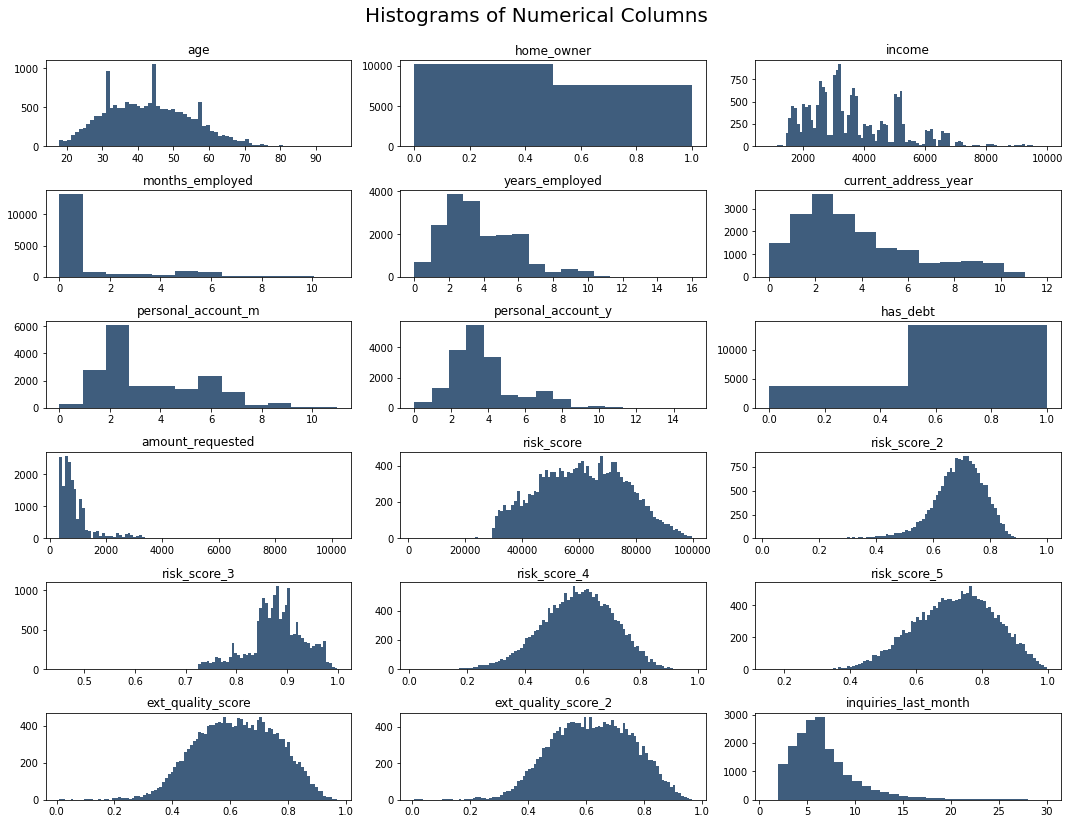

In [ ]:
#Dropping the unnecessary columns
dataset2 = df.drop(columns = ['entry_id', 'pay_schedule', 'e_signed'])

fig = plt.figure(figsize=(15, 12))

plt.suptitle('Histograms of Numerical Columns', fontsize=20)
for i in range(dataset2.shape[1]):
    plt.subplot(6, 3, i + 1)
    f = plt.gca()
    f.set_title(dataset2.columns.values[i])

    vals = np.size(dataset2.iloc[:, i].unique())
    if vals >= 100:
        vals = 100

    plt.hist(dataset2.iloc[:, i], bins=vals, color='#3F5D7D')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])

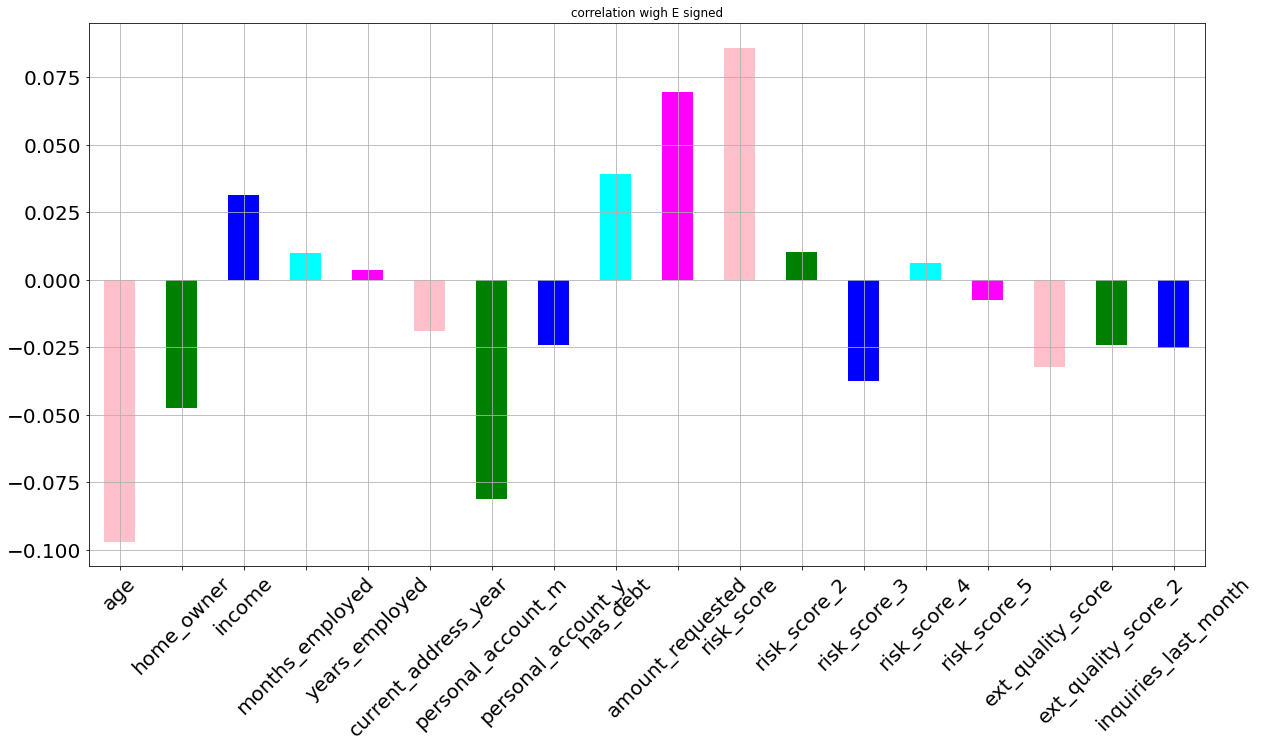

In [ ]:
#Correlation of independent variable with dependent variable

dataset2.corrwith(df.e_signed).plot.bar(figsize=(20,10),title="correlation wigh E signed",
                                             fontsize=20,rot=45,grid= True,color=['pink','green',
                                                                                  'blue','cyan','magenta'])

In [ ]:
#Initiatizig into new variable and creating the dummy variable for categorical data
data=df
dummy=pd.get_dummies(data["pay_schedule"])

In [ ]:
dummy

,bi-weekly,monthly,semi-monthly,weekly
0,1,0,0,0
1,0,0,0,1
2,0,0,0,1
3,1,0,0,0
4,0,0,1,0
...,...,...,...,...
17903,0,1,0,0
17904,1,0,0,0
17905,0,0,0,1
17906,1,0,0,0


In [ ]:
data=data.drop(["pay_schedule"],axis=1)

In [ ]:
data=pd.concat([data,dummy],axis=1)

In [ ]:
data.shape

(17908, 23)

In [ ]:
# Seperating the data into dependent and independent varioable. Response contains the esigned column which needs to be computed
#from the dataset
response = data["e_signed"]
dataset = data.drop(columns = ["e_signed", "entry_id"])

In [ ]:
#Transforming the data using StandardScaler
from sklearn.preprocessing import StandardScaler
sc_X= StandardScaler()

In [ ]:
# Splitting into Train and Test Set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(dataset,
                                                    response,
                                                    test_size = 0.2,
                                                    random_state = 0)

In [ ]:
#Fitting and transforming our data
X_train=sc_X.fit_transform(X_train)
X_test=sc_X.transform(X_test)


In [ ]:
X_train.shape

(14326, 21)

#### Building ANN Using Keras

In [23]:
# Importing the Keras libraries and packages
import keras
from keras.models import Sequential
from keras.layers import Dense


classifier = Sequential()

In [24]:
#Adding the layers in ANN
classifier.add(Dense(units = 10, kernel_initializer = 'uniform', activation = 'relu', input_dim = 21))


classifier.add(Dense(units = 10, kernel_initializer = 'uniform', activation = 'relu'))


classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))


classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [25]:
# Fitting the ANN to the Training set
classifier.fit(X_train, y_train, batch_size = 10, epochs = 100)

Epoch 1/100
1433/1433 [==============================] - 3s 2ms/step - loss: 0.6725 - accuracy: 0.5759
Epoch 2/100
1433/1433 [==============================] - 3s 2ms/step - loss: 0.6604 - accuracy: 0.6010
Epoch 3/100
1433/1433 [==============================] - 3s 2ms/step - loss: 0.6544 - accuracy: 0.6064
Epoch 4/100
1433/1433 [==============================] - 3s 2ms/step - loss: 0.6504 - accuracy: 0.6105
Epoch 5/100
1433/1433 [==============================] - 3s 2ms/step - loss: 0.6474 - accuracy: 0.6178
Epoch 6/100
1433/1433 [==============================] - 3s 2ms/step - loss: 0.6460 - accuracy: 0.6224
Epoch 7/100
1433/1433 [==============================] - 3s 2ms/step - loss: 0.6446 - accuracy: 0.6169
Epoch 8/100
1433/1433 [==============================] - 3s 2ms/step - loss: 0.6434 - accuracy: 0.6206
Epoch 9/100
1433/1433 [==============================] - 3s 2ms/step - loss: 0.6426 - accuracy: 0.6268
Epoch 10/100
1433/1433 [==============================] - 3s 2ms/step - l

In [67]:
y_pred = (pred > 0.5)

#### Feature Engineering

In [33]:
##### AGE


#Initializing the Empty List
AGE=[]

for i in range(len(df)):
    if(df["age"][i]<=45):
        AGE.append("ADULT")
        
    else:
        AGE.append("SENIOR")

In [35]:
EMPLOYED=[]
for i in range(len(df)):
    x=df["months_employed"][i]+df["years_employed"][i]*12
    EMPLOYED.append(x)


In [29]:
PA=[]
for i in range(len(df)):
    x=df["personal_account_m"][i]+df["personal_account_y"][i]*12
    PA.append(x)

In [30]:
avg_risk=[]
for i in range(len(df)):
    x=(df["risk_score_2"][i]+df["risk_score_3"][i]+df["risk_score_4"][i]+df["risk_score_5"][i])/4
    avg_risk.append(x)

In [31]:
ext_quality=[]
for i in range(len(df)):
    x=(df["ext_quality_score_2"][i]+df["ext_quality_score"][i])/2
    ext_quality.append(x)

In [36]:
#Converting all lists into DataFrame
AGE=pd.DataFrame(AGE)
EMPLOYED=pd.DataFrame(EMPLOYED)
PA=pd.DataFrame(PA)
avg_risk=pd.DataFrame(avg_risk)
ext_quality=pd.DataFrame(ext_quality)

#Concatng all the features
featured=pd.concat([AGE,EMPLOYED,PA,avg_risk,ext_quality],axis=1)

In [37]:
featured.columns=["AGE","EMPLOYED","PA","RISK","QUALITY"]

featured.head()

,AGE,EMPLOYED,PA,RISK,QUALITY
0,ADULT,36,30,0.661151,0.480918
1,SENIOR,72,86,0.789841,0.680720
2,ADULT,6,19,0.691712,0.531712
3,ADULT,72,86,0.793179,0.692552
4,ADULT,60,98,0.688483,0.744634


In [38]:
#Creating Dummy Variable
dummy1=pd.get_dummies(featured["AGE"])
dummy1.head()

,ADULT,SENIOR
0,1,0
1,0,1
2,1,0
3,1,0
4,1,0


In [39]:
#Dropping the AGE Variable since dummy variable is created
featured=featured.drop(["AGE"],axis=1)

#Concating the data and dummy variable
featured=pd.concat([featured,dummy1],axis=1)
featured.head()

,EMPLOYED,PA,RISK,QUALITY,ADULT,SENIOR
0,36,30,0.661151,0.480918,1,0
1,72,86,0.789841,0.680720,0,1
2,6,19,0.691712,0.531712,1,0
3,72,86,0.793179,0.692552,1,0
4,60,98,0.688483,0.744634,1,0


In [40]:
#Dependent Variable
dep="e_signed"

#Selelcting all the column as independent variable
ind=df.columns.tolist()

In [41]:
#Removing the dependent variable from independent
ind.remove(dep)
ind.remove("entry_id")

In [42]:
#Selecting the Data
X=df[ind]
Y=df[dep]

In [43]:
#Concating the featured data and unfeatured data
X=pd.concat([X,featured],axis=1)
X.head()

,age,pay_schedule,home_owner,income,months_employed,years_employed,current_address_year,personal_account_m,personal_account_y,has_debt,...,risk_score_5,ext_quality_score,ext_quality_score_2,inquiries_last_month,EMPLOYED,PA,RISK,QUALITY,ADULT,SENIOR
0,40,bi-weekly,1,3135,0,3,3,6,2,1,...,0.515977,0.580918,0.380918,10,36,30,0.661151,0.480918,1,0
1,61,weekly,0,3180,0,6,3,2,7,1,...,0.826402,0.730720,0.630720,9,72,86,0.789841,0.680720,0,1
2,23,weekly,0,1540,6,0,0,7,1,1,...,0.762284,0.531712,0.531712,7,6,19,0.691712,0.531712,1,0
3,40,bi-weekly,0,5230,0,6,1,2,7,1,...,0.778831,0.792552,0.592552,8,72,86,0.793179,0.692552,1,0
4,33,semi-monthly,0,3590,0,5,2,2,8,1,...,0.665523,0.744634,0.744634,12,60,98,0.688483,0.744634,1,0


In [44]:
#Dropping the unnecessay data from our dataset
X=X.drop(labels=["age","months_employed","years_employed","personal_account_m","personal_account_y","risk_score_2","risk_score_3"
                ,"risk_score_4","risk_score_5","ext_quality_score_2","ext_quality_score"],axis=1)

In [45]:
X.head()

,pay_schedule,home_owner,income,current_address_year,has_debt,amount_requested,risk_score,inquiries_last_month,EMPLOYED,PA,RISK,QUALITY,ADULT,SENIOR
0,bi-weekly,1,3135,3,1,550,36200,10,36,30,0.661151,0.480918,1,0
1,weekly,0,3180,3,1,600,30150,9,72,86,0.789841,0.680720,0,1
2,weekly,0,1540,0,1,450,34550,7,6,19,0.691712,0.531712,1,0
3,bi-weekly,0,5230,1,1,700,42150,8,72,86,0.793179,0.692552,1,0
4,semi-monthly,0,3590,2,1,1100,53850,12,60,98,0.688483,0.744634,1,0


In [46]:
#Creating Dummy Variable
dummy2=pd.get_dummies(X["pay_schedule"])

#Removing the trap
dummy2=dummy2.drop(labels=["bi-weekly"],axis=1)
dummy2.head()

,monthly,semi-monthly,weekly
0,0,0,0
1,0,0,1
2,0,0,1
3,0,0,0
4,0,1,0


In [47]:
#Dropping the pay_schedule since dummy variable is created
X=X.drop(labels=["pay_schedule"],axis=1)

#Concating the data and dummy variable
X=pd.concat([X,dummy2],axis=1)
X.head()

,home_owner,income,current_address_year,has_debt,amount_requested,risk_score,inquiries_last_month,EMPLOYED,PA,RISK,QUALITY,ADULT,SENIOR,monthly,semi-monthly,weekly
0,1,3135,3,1,550,36200,10,36,30,0.661151,0.480918,1,0,0,0,0
1,0,3180,3,1,600,30150,9,72,86,0.789841,0.680720,0,1,0,0,1
2,0,1540,0,1,450,34550,7,6,19,0.691712,0.531712,1,0,0,0,1
3,0,5230,1,1,700,42150,8,72,86,0.793179,0.692552,1,0,0,0,0
4,0,3590,2,1,1100,53850,12,60,98,0.688483,0.744634,1,0,0,1,0


In [48]:
#### Data Transformation and Model Building


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [49]:
scale=StandardScaler()
#Transforming the data
X=scale.fit_transform(X)

In [50]:
#from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.25,random_state=0)

In [51]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

In [52]:
#Initializing the object
model=RandomForestClassifier()

In [53]:
#Fitting the model
model.fit(xtrain,ytrain)

RandomForestClassifier()

In [54]:
#Predictions on test data
pred=model.predict(xtest)

In [55]:
accuracy_score(ytest,pred)

0.6140272503908868

In [56]:
lr_list = [0.05, 0.075, 0.1, 0.25, 0.5, 0.75, 1]

for learning_rate in lr_list:
    gb_clf = GradientBoostingClassifier(n_estimators=20, learning_rate=learning_rate, max_features=2, max_depth=2, random_state=0)
    gb_clf.fit(xtrain, ytrain)

In [57]:
print("Learning rate: ", learning_rate)
print("Accuracy score (training): {0:.3f}".format(gb_clf.score(xtrain, ytrain)))
print("Accuracy score (validation): {0:.3f}".format(gb_clf.score(xtest, ytest)))

Learning rate:  1
Accuracy score (training): 0.622
Accuracy score (validation): 0.583


In [58]:
#Implementing xgboost
from xgboost import XGBClassifier

In [59]:
#Initializing the model
xgb_clf = XGBClassifier()
xgb_clf.fit(xtrain, ytrain)

XGBClassifier()

In [60]:
score = xgb_clf.score(xtest, ytest)
print(score)

0.6278758096939915


In [61]:
from sklearn.svm import SVC
classifier = SVC(random_state = 0, kernel = 'rbf')
classifier.fit(xtrain, ytrain)

SVC(random_state=0)

In [62]:
# Predicting Test Set
y_pred = classifier.predict(xtest)

In [63]:
#Finding the Accuracy Score
acc = accuracy_score(ytest, y_pred)
acc

0.5887871342416797